## Logistic_Regression_Handling_Imbalanced_data

In [1]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

## Reading Data

In [2]:
churnData = pd.read_csv('Data/DATA_Customer-Churn.csv')
churnData.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes


<b> Original Data Target Classes

In [3]:
churnData['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

## Processing Data

In [4]:
churnData.dtypes
churnData['TotalCharges']  = pd.to_numeric(churnData['TotalCharges'], errors='coerce')
churnData.isna().sum()
churnData['TotalCharges'] = churnData['TotalCharges'].fillna(np.mean(churnData['TotalCharges']))

X = churnData[['tenure', 'SeniorCitizen','MonthlyCharges', 'TotalCharges']]
y = pd.DataFrame(data=churnData, columns=['Churn'])
transformer = StandardScaler().fit(X)
scaled_x = transformer.transform(X)

## Building the model

In [5]:
X_train, X_test, y_train, y_test = train_test_split(scaled_x, y, test_size=0.30)
classification = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred_test = classification.predict(X_test)
y_pred_test

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

<b> Accuracy  </b>

In [ ]:
classification.score(X_test, y_test)

In [ ]:
def performance_log(y_test, y_pred_test):
    return pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Test': [accuracy_score(y_test, y_pred_test),
                                        precision_score(y_test, y_pred_test,pos_label="Yes"),
                                        recall_score(y_test, y_pred_test,pos_label="Yes")]})

In [ ]:
performance_log(y_test, y_pred_test)

In [ ]:
def plot_conf_matrix(y_test, y_pred_test):
    print("Confusion matrix for the test set")
    print(confusion_matrix(y_test, y_pred_test))
    plot_confusion_matrix(classification,X_test,y_test, values_format = 'd')
    plt.show()

In [ ]:
plot_conf_matrix(y_test, y_pred_test)

## Managing imbalance

## Upsampling

In [ ]:
counts = churnData['Churn'].value_counts()
counts

In [ ]:
yes = churnData[churnData['Churn']=='Yes'].sample(counts[0], replace=True)
no = churnData[churnData['Churn']=='No']
data = pd.concat([yes,no], axis=0)
data = data.sample(frac=1)

In [ ]:
data['Churn'].value_counts()

In [ ]:
X = data[['tenure', 'SeniorCitizen','MonthlyCharges', 'TotalCharges']]
y = pd.DataFrame(data['Churn'])
transformer = StandardScaler().fit(X)
scaled_x = transformer.transform(X)
X_train, X_test, y_train, y_test = train_test_split(scaled_x, y, test_size=0.33)
classification = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred_test = classification.predict(X_test)

<b> Accuracy

In [ ]:
classification.score(X_test, y_test)

In [ ]:
performance_log(y_test, y_pred_test)

In [ ]:
plot_conf_matrix(y_test, y_pred_test)

## Downsampling

In [23]:
churnData=churnData.replace("No", 0). replace("Yes", 1)

In [24]:
churnData

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,0,1,0,0,0,0,Month-to-month,29.85,29.85,0
1,Male,0,0,0,34,1,1,0,1,0,0,0,One year,56.95,1889.50,0
2,Male,0,0,0,2,1,1,1,0,0,0,0,Month-to-month,53.85,108.15,1
3,Male,0,0,0,45,0,1,0,1,1,0,0,One year,42.30,1840.75,0
4,Female,0,0,0,2,1,0,0,0,0,0,0,Month-to-month,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,1,1,24,1,1,0,1,1,1,1,One year,84.80,1990.50,0
7039,Female,0,1,1,72,1,0,1,1,0,1,1,One year,103.20,7362.90,0
7040,Female,0,1,1,11,0,1,0,0,0,0,0,Month-to-month,29.60,346.45,0
7041,Male,1,1,0,4,1,0,0,0,0,0,0,Month-to-month,74.40,306.60,1


In [26]:
yes = churnData[churnData['Churn']=='1']
no = churnData[churnData['Churn']=='0']
no = no.sample(len(yes))
data = pd.concat([yes,no], axis=0)
data = data.sample(frac=1)
data['Churn'].value_counts()

Series([], Name: Churn, dtype: int64)

In [27]:
data.shape

(0, 16)

In [ ]:
X = data[['tenure', 'SeniorCitizen','MonthlyCharges', 'TotalCharges']]
y = pd.DataFrame(data['Churn'])
transformer = StandardScaler().fit(X)
scaled_x = transformer.transform(X)
X_train, X_test, y_train, y_test = train_test_split(scaled_x, y, test_size=0.33)
classification = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr').fit(X_train, y_train)
y_pred_test = classification.predict(X_test)

<b> Accuracy

In [ ]:
classification.score(X_test, y_test)

In [ ]:
performance_log(y_test, y_pred_test)

## Fit a Decision Tree Classifier on the training data.

In [6]:
churnData.shape

(7043, 16)

In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [8]:
X = churnData[['tenure', 'SeniorCitizen','MonthlyCharges', 'TotalCharges']]
y = pd.DataFrame(churnData['Churn'])

In [9]:
y=y.replace("No", 0).replace("Yes",1)

In [10]:
y

,Churn
0,0
1,0
2,1
3,0
4,1
...,...
7038,0
7039,0
7040,0
7041,1


In [11]:
model = DecisionTreeClassifier(max_depth=3)

# Not needed because I'm using a decision tree
#trans = PowerTransform(), StandardScaler()
#trans.fit(X_train)

model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test  = model.predict(X_test)

In [12]:
def performance_model(y_train, y_test, y_pred_train, y_pred_test):

    # Model validation y_train - y_pred_train
    ME_train = np.mean(y_train-y_pred_train)
    ME_test  = np.mean(y_test-y_pred_test)

    MAE_train = mean_absolute_error(y_train,y_pred_train)
    MAE_test  = mean_absolute_error(y_test,y_pred_test)

    MSE_train = mean_squared_error(y_train,y_pred_train)
    MSE_test  = mean_squared_error(y_test,y_pred_test)

    RMSE_train = np.sqrt(MSE_train)
    RMSE_test  = np.sqrt(MSE_test)

    MAPE_train = np.mean((np.abs(y_train-y_pred_train) / y_train)* 100.)
    MAPE_test  = np.mean((np.abs(y_test-y_pred_test) / y_test)* 100.)

    R2_train = r2_score(y_train,y_pred_train)
    R2_test  = r2_score(y_test,y_pred_test)

    performance = pd.DataFrame({'Error_metric': ['Mean error','Mean absolute error','Mean squared error',
                                             'Root mean squared error','Mean absolute percentual error',
                                             'R2'],
                            'Train': [ME_train, MAE_train, MSE_train, RMSE_train, MAPE_train, R2_train],
                            'Test' : [ME_test, MAE_test , MSE_test, RMSE_test, MAPE_test, R2_test]})

    pd.options.display.float_format = '{:.2f}'.format


    df_train = pd.DataFrame({'Real_value': y_train, 'Predicted_value': y_pred_train})
    df_test  = pd.DataFrame({'Real_value': y_test,  'PRedicted_value': y_pred_test})

    return performance, df_train, df_test

,Error_metric,Train,Test
0,Accuracy,0.787018,0.778514
1,Precision,0.647904,0.662500
2,Recall,0.417116,0.370629


Confusion matrix for the train set
[[3339  756]
 [ 294  541]]


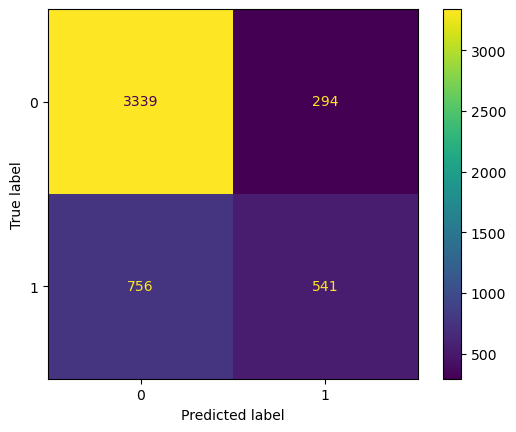



Confusion matrix for the test set
[[1433  360]
 [ 108  212]]


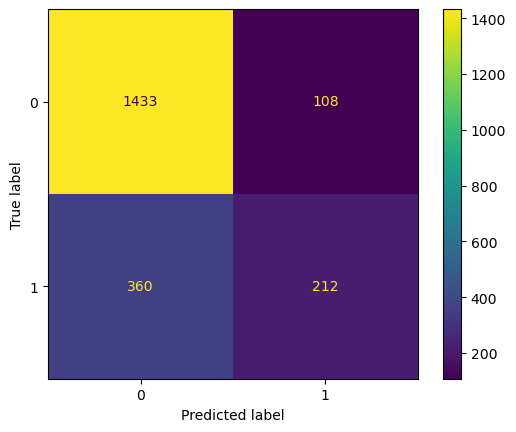

In [15]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=11)

# Bear in mind that sklearn uses a different function for decission trees used for 
# classification ( to predict a categorical feature ): DecisionTreeClassifier() 
dt = DecisionTreeClassifier(max_depth=3)

dt.fit(X_train, y_train)

y_pred_train_dt = dt.predict(X_train)
y_pred_test_dt = dt.predict(X_test)

#prob_pred_test_dt = model.predict_proba(X_test)

performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt),
                                         recall_score(y_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})

display(performance_df)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_dt).T)
plot_confusion_matrix(dt,X_train,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test,y_pred_test_dt).T)
plot_confusion_matrix(dt,X_test,y_test, values_format = 'd')
plt.show()

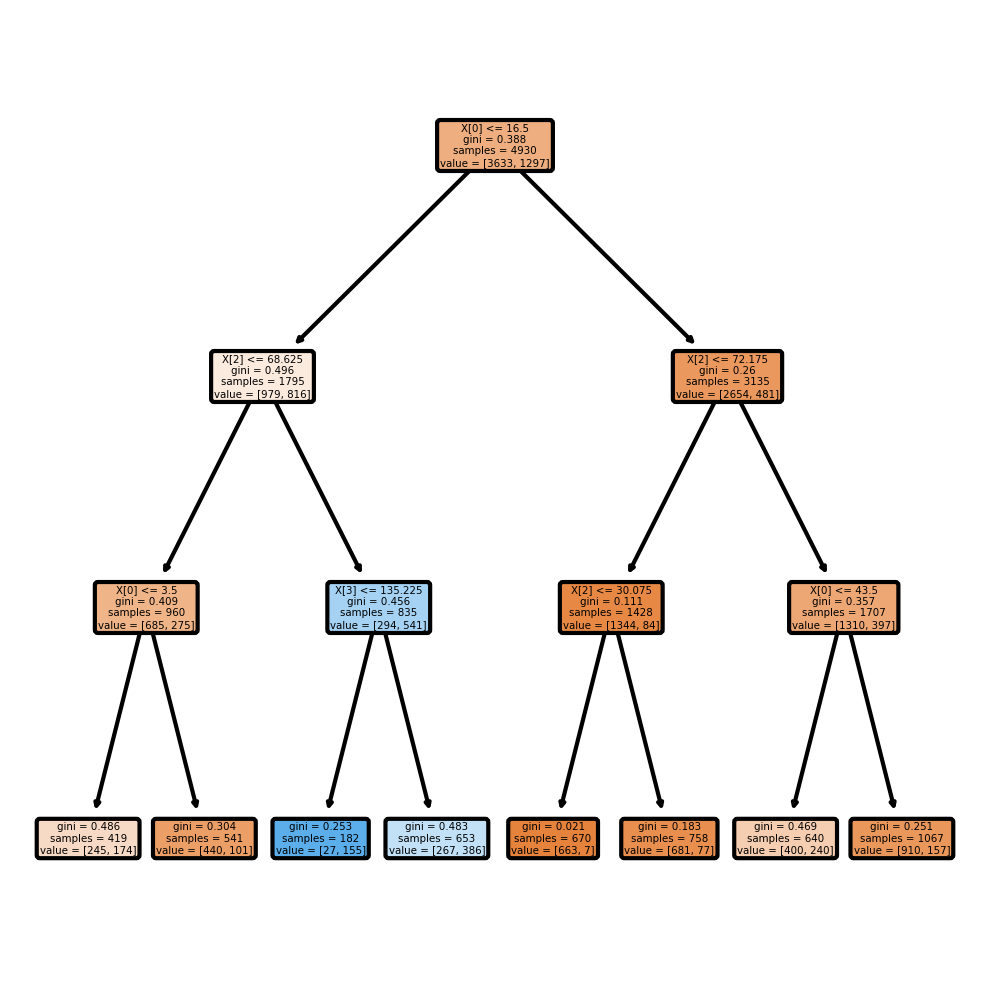

In [16]:


fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)

plot_tree(dt,filled = True, rounded=True)
plt.show()

#gini ist das Kriterium, das der Entscheidungsbaum beim Aufteilen der verfügbaren Features im Datensatz
#(Qualität der Aufteilung) berücksichtigen muss, um eine Entscheidung zu treffen.

In [17]:
X_train #x0-> tenure X2:monthly charges #x3totalcharges

#first branch: if tenure is smaller or equan than 16.05 and the totalcharges are below or equal 68.xx and tenure not likley to churn
#

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges
3993,70,0,66.00,4891.50
3148,47,0,75.45,3545.10
3531,16,0,19.35,295.55
4403,32,0,62.45,2045.55
1859,52,0,85.35,4338.60
...,...,...,...,...
1293,67,0,111.20,7530.80
4023,42,0,19.80,849.90
5200,70,0,106.50,7397.00
3775,41,1,98.40,4187.75


### apply K-fold cross validation on your Decision Tree Classifier and check the model score.

In [18]:
from sklearn import svm
from sklearn.model_selection import cross_val_score #calculation score for every fault 
from sklearn.model_selection import cross_val_predict

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(scaled_x, y, test_size=0.30)


In [19]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7079981069569332

In [20]:
scores=cross_val_score(model, X_train, y_train, cv=10)
scores

array([0.75659229, 0.69371197, 0.74442191, 0.71805274, 0.75659229,
       0.72210953, 0.75862069, 0.73427992, 0.73225152, 0.72616633])

In [21]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.73 accuracy with a standard deviation of 0.02


## Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
#no need for onehot-> just numerical data here, yes no already converted

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [33]:
#After splitting, you will train the model on the training set and perform predictions on the test set.

#dont need transformation
#cross validiation always apply -> random forrest it checkes outlier or not

clf = RandomForestClassifier(max_depth=2, random_state=0) #Create a Gaussian Classifier
clf.fit(X_train, y_train) #Train the model using the training sets y_pred=clf.predict(X_test)
print(clf.score(X_test, y_test))#accuracy score

0.7728563316297559


In [34]:
from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(max_depth=2, random_state=0)
cross_val_scores = cross_val_score(clf, X_train, y_train, cv=10)
cross_val_scores



array([0.77882798, 0.7826087 , 0.78977273, 0.76893939, 0.78787879,
       0.76325758, 0.76515152, 0.77651515, 0.76893939, 0.78219697])

In [32]:
np.mean(cross_val_scores)

0.7764088188119379

### finding importan features #playing around

In [41]:
churnData 

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,0,1,0,0,0,0,Month-to-month,29.85,29.85,0
1,Male,0,0,0,34,1,1,0,1,0,0,0,One year,56.95,1889.50,0
2,Male,0,0,0,2,1,1,1,0,0,0,0,Month-to-month,53.85,108.15,1
3,Male,0,0,0,45,0,1,0,1,1,0,0,One year,42.30,1840.75,0
4,Female,0,0,0,2,1,0,0,0,0,0,0,Month-to-month,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,1,1,24,1,1,0,1,1,1,1,One year,84.80,1990.50,0
7039,Female,0,1,1,72,1,0,1,1,0,1,1,One year,103.20,7362.90,0
7040,Female,0,1,1,11,0,1,0,0,0,0,0,Month-to-month,29.60,346.45,0
7041,Male,1,1,0,4,1,0,0,0,0,0,0,Month-to-month,74.40,306.60,1


In [49]:
feature_imp = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp

tenure            0.502932
MonthlyCharges    0.257276
TotalCharges      0.204841
SeniorCitizen     0.034951
dtype: float64

No handles with labels found to put in legend.


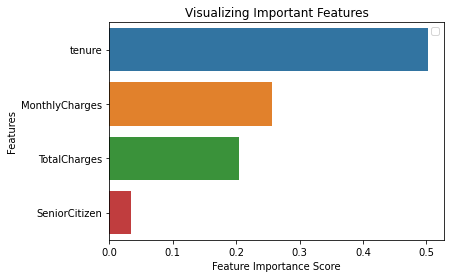

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()